### **Average Assists per Game Analysis**

In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
import datetime
from tqdm import tqdm

# Navigate to Directory #
drive.mount('/content/drive')
path = "/content/drive/MyDrive/DSO574 - NBA"
os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
year2017_2018 = './2017-2018 NBA Play-By-Play Data.csv'
year2017_2018 = pd.read_csv(year2017_2018)

year2018_2019 = '/content/drive/MyDrive/DSO574 - NBA/2018-2019 NBA Play-By-Play Data.csv'
year2018_2019 = pd.read_csv(year2018_2019)

year2019_2020 = '/content/drive/MyDrive/DSO574 - NBA/2019-2020 NBA Play-By-Play Data.csv'
year2019_2020 = pd.read_csv(year2019_2020)
year2019_2020.head()
import pandas as pd

df_combined = pd.concat([year2017_2018, year2018_2019, year2019_2020], ignore_index=True)
print(f"Combined DataFrame has {df_combined.shape[0]} rows.")
df_combined['date'] = pd.to_datetime(df_combined['date'])

<ipython-input-169-10540b6c4365>:3: DtypeWarning: Columns (39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  year2017_2018 = pd.read_csv(year2017_2018)
<ipython-input-169-10540b6c4365>:6: DtypeWarning: Columns (40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  year2018_2019 = pd.read_csv(year2018_2019)
<ipython-input-169-10540b6c4365>:9: DtypeWarning: Columns (40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  year2019_2020 = pd.read_csv(year2019_2020)


Combined DataFrame has 1764069 rows.


In [ ]:
data = df_combined[['game_id','data_set','date','a1','a2','a3','a4','a5','h1','h2','h3','h4','h5','play_length','team','away_score','home_score','event_type','assist','away','home','block','entered','left','num','player','points','possession','steal','type']]

In [ ]:
data['data_set'] = data['data_set'].replace({'2019-20 Regular Season': '2019-2020 Regular Season'})

LAL_team = data[data['team'] == 'LAL']
LAL_team['data_set'] = LAL_team['data_set'].replace({'2019-20 Regular Season': '2019-2020 Regular Season'})
LAL_team

<ipython-input-171-00971a1670b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['data_set'] = data['data_set'].replace({'2019-20 Regular Season': '2019-2020 Regular Season'})
<ipython-input-171-00971a1670b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LAL_team['data_set'] = LAL_team['data_set'].replace({'2019-20 Regular Season': '2019-2020 Regular Season'})


,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,...,home,block,entered,left,num,player,points,possession,steal,type
853,"=""0021700788""",2017-2018 Regular Season,2018-02-04,Josh Hart,Julius Randle,Brook Lopez,Kentavious Caldwell-Pope,Brandon Ingram,Paul George,Carmelo Anthony,...,NaN,NaN,NaN,NaN,NaN,Josh Hart,NaN,NaN,NaN,rebound defensive
854,"=""0021700788""",2017-2018 Regular Season,2018-02-04,Josh Hart,Julius Randle,Brook Lopez,Kentavious Caldwell-Pope,Brandon Ingram,Paul George,Carmelo Anthony,...,NaN,NaN,NaN,NaN,NaN,Brandon Ingram,0.0,NaN,NaN,Turnaround Fadeaway
857,"=""0021700788""",2017-2018 Regular Season,2018-02-04,Josh Hart,Julius Randle,Brook Lopez,Kentavious Caldwell-Pope,Brandon Ingram,Paul George,Carmelo Anthony,...,NaN,NaN,NaN,NaN,NaN,Brook Lopez,NaN,NaN,NaN,rebound defensive
859,"=""0021700788""",2017-2018 Regular Season,2018-02-04,Josh Hart,Julius Randle,Brook Lopez,Kentavious Caldwell-Pope,Brandon Ingram,Paul George,Carmelo Anthony,...,NaN,NaN,NaN,NaN,1.0,Josh Hart,1.0,NaN,NaN,Free Throw 1 of 2
860,"=""0021700788""",2017-2018 Regular Season,2018-02-04,Josh Hart,Julius Randle,Brook Lopez,Kentavious Caldwell-Pope,Brandon Ingram,Paul George,Carmelo Anthony,...,NaN,NaN,NaN,NaN,2.0,Josh Hart,1.0,NaN,NaN,Free Throw 2 of 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755976,21900074,2019-2020 Regular Season,2019-11-01,LeBron James,Anthony Davis,Danny Green,Avery Bradley,Alex Caruso,Dorian Finney-Smith,Kristaps Porzingis,...,NaN,NaN,NaN,NaN,2.0,LeBron James,0.0,NaN,NaN,Free Throw 2 of 2
1755980,21900074,2019-2020 Regular Season,2019-11-01,LeBron James,Anthony Davis,Danny Green,Avery Bradley,Alex Caruso,Dorian Finney-Smith,Kristaps Porzingis,...,NaN,NaN,NaN,NaN,1.0,Danny Green,0.0,NaN,NaN,Free Throw 1 of 2
1755982,21900074,2019-2020 Regular Season,2019-11-01,LeBron James,Danny Green,Avery Bradley,Alex Caruso,Troy Daniels,Dorian Finney-Smith,Kristaps Porzingis,...,NaN,NaN,Troy Daniels,Anthony Davis,NaN,Anthony Davis,NaN,NaN,NaN,sub
1755983,21900074,2019-2020 Regular Season,2019-11-01,Danny Green,Avery Bradley,Alex Caruso,Troy Daniels,Kentavious Caldwell-Pope,Dorian Finney-Smith,Kristaps Porzingis,...,NaN,NaN,Kentavious Caldwell-Pope,LeBron James,NaN,LeBron James,NaN,NaN,NaN,sub


In [ ]:
lebron_assist_count_by_data_set = (
    LAL_team.groupby('data_set')
    .apply(lambda x: x[x['assist'] == 'LeBron James']['assist'].count())
    .reset_index(name='lebron_assist_count')
)

print(lebron_assist_count_by_data_set)

                   data_set  lebron_assist_count
0  2017-2018 Regular Season                    0
1  2018-2019 Regular Season                  454
2          2019-20 Playoffs                  184
3  2019-2020 Regular Season                  684


In [ ]:
anthony_assist_count_by_data_set = (
    LAL_team.groupby('data_set')
    .apply(lambda x: x[x['assist'] == 'Anthony Davis']['assist'].count())
    .reset_index(name='anthony_assist_count')
)

print(anthony_assist_count_by_data_set)

                   data_set  anthony_assist_count
0  2017-2018 Regular Season                     0
1  2018-2019 Regular Season                     0
2          2019-20 Playoffs                    73
3  2019-2020 Regular Season                   200


In [ ]:
LAL_assist_count_by_data_set = (
    LAL_team.groupby('data_set')
    .apply(lambda x: x[x['assist'].notnull()]['assist'].count())
    .reset_index(name='LAL_assist_count')
)

print(LAL_assist_count_by_data_set)

                   data_set  LAL_assist_count
0  2017-2018 Regular Season              1950
1  2018-2019 Regular Season              2096
2          2019-20 Playoffs               538
3  2019-2020 Regular Season              1803


In [ ]:
import pandas as pd

# Assuming you have three dataframes: lebron_assist_count_by_data_set, anthony_assist_count_by_data_set, and LAL_assist_count_by_data_set

# Merge lebron_assist_count_by_data_set and anthony_assist_count_by_data_set
assists_count = pd.merge(lebron_assist_count_by_data_set, anthony_assist_count_by_data_set, on='data_set')

# Merge with LAL_assist_count_by_data_set
assists_count = pd.merge(assists_count, LAL_assist_count_by_data_set, on='data_set')

print(assists_count)


                   data_set  lebron_assist_count  anthony_assist_count  \
0  2017-2018 Regular Season                    0                     0   
1  2018-2019 Regular Season                  454                     0   
2          2019-20 Playoffs                  184                    73   
3  2019-2020 Regular Season                  684                   200   

   LAL_assist_count  
0              1950  
1              2096  
2               538  
3              1803  


In [ ]:
LAL_game_count = (
    LAL_team[LAL_team['team'] == 'LAL']
    .groupby('data_set')
    ['game_id']
    .nunique()
    .reset_index(name='LAL_game_count')
)
LAL_game_count

,data_set,LAL_game_count
0,2017-2018 Regular Season,82
1,2018-2019 Regular Season,82
2,2019-20 Playoffs,21
3,2019-2020 Regular Season,71


In [ ]:
# Merge the DataFrames on 'data_set'
merged_game_assist = pd.merge(LAL_assist_count_by_data_set, LAL_game_count, on='data_set')

# Calculate assists per game
merged_game_assist['assists_per_game'] = merged_game_assist['LAL_assist_count'] / merged_game_assist['LAL_game_count']

# Drop unnecessary columns
merged_game_assist.drop(['LAL_assist_count', 'LAL_game_count'], axis=1, inplace=True)
print(merged_game_assist)

                   data_set  assists_per_game
0  2017-2018 Regular Season         23.780488
1  2018-2019 Regular Season         25.560976
2          2019-20 Playoffs         25.619048
3  2019-2020 Regular Season         25.394366


In [ ]:
lebron_assist_per_game = pd.merge(lebron_assist_count_by_data_set, LAL_game_count, on='data_set')

# Calculate assists per game
lebron_assist_per_game['assists_per_game'] = lebron_assist_per_game['lebron_assist_count'] / lebron_assist_per_game['LAL_game_count']

# Drop unnecessary columns
lebron_assist_per_game.drop(['lebron_assist_count', 'LAL_game_count'], axis=1, inplace=True)
print(lebron_assist_per_game)

                   data_set  assists_per_game
0  2017-2018 Regular Season          0.000000
1  2018-2019 Regular Season          5.536585
2          2019-20 Playoffs          8.761905
3  2019-2020 Regular Season          9.633803


In [ ]:
anthony_assist_per_game = pd.merge(anthony_assist_count_by_data_set, LAL_game_count, on='data_set')

# Calculate assists per game
anthony_assist_per_game['assists_per_game'] = anthony_assist_per_game['anthony_assist_count'] / anthony_assist_per_game['LAL_game_count']

# Drop unnecessary columns
anthony_assist_per_game.drop(['anthony_assist_count', 'LAL_game_count'], axis=1, inplace=True)
print(anthony_assist_per_game)

                   data_set  assists_per_game
0  2017-2018 Regular Season          0.000000
1  2018-2019 Regular Season          0.000000
2          2019-20 Playoffs          3.476190
3  2019-2020 Regular Season          2.816901


In [ ]:
# Merge lebron_assist_per_game with anthony_assist_per_game
merged_df = pd.merge(lebron_assist_per_game, anthony_assist_per_game, on='data_set', suffixes=('_lebron', '_anthony'))

# Merge the result with merged_game_assist
merged_df = pd.merge(merged_df, merged_game_assist, on='data_set')
merged_df['assists_per_game_other_players'] = merged_df['assists_per_game'] - merged_df['assists_per_game_lebron'] - merged_df['assists_per_game_anthony']

print(merged_df)

                   data_set  assists_per_game_lebron  \
0  2017-2018 Regular Season                 0.000000   
1  2018-2019 Regular Season                 5.536585   
2          2019-20 Playoffs                 8.761905   
3  2019-2020 Regular Season                 9.633803   

   assists_per_game_anthony  assists_per_game  assists_per_game_other_players  
0                  0.000000         23.780488                       23.780488  
1                  0.000000         25.560976                       20.024390  
2                  3.476190         25.619048                       13.380952  
3                  2.816901         25.394366                       12.943662  


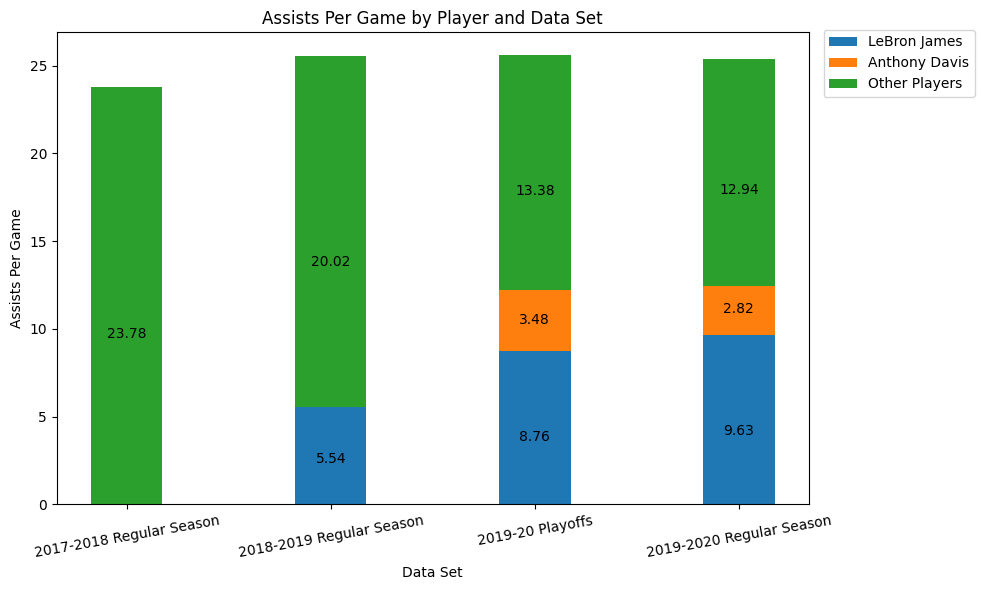

In [ ]:
import matplotlib.pyplot as plt

# Assuming merged_df contains your data
# Replace 'assists_per_game_lebron', 'assists_per_game_anthony', and 'assists_per_game_other_players' with actual column names

# Plot the data
plt.figure(figsize=(10, 6))

# Define the width of the bars
bar_width = 0.35

# Calculate the total assists for text annotations (if not already calculated)
total_assists = merged_df['assists_per_game_lebron'] + merged_df['assists_per_game_anthony'] + merged_df['assists_per_game_other_players']

# Plot the bars for each player with adjusted width
lebron_bars = plt.bar(merged_df.index, merged_df['assists_per_game_lebron'], width=bar_width, label='LeBron James')
anthony_bars = plt.bar(merged_df.index, merged_df['assists_per_game_anthony'], width=bar_width, bottom=merged_df['assists_per_game_lebron'], label='Anthony Davis')
other_players_bars = plt.bar(merged_df.index, merged_df['assists_per_game_other_players'], width=bar_width, bottom=merged_df['assists_per_game_lebron'] + merged_df['assists_per_game_anthony'], label='Other Players')

plt.xlabel('Data Set')
plt.ylabel('Assists Per Game')
plt.title('Assists Per Game by Player and Data Set')
plt.legend()

# Set the position of the x ticks and labels
plt.xticks(merged_df.index, merged_df['data_set'], rotation=10)

# Add text annotations for amount on top of each bar
for bars in [lebron_bars, anthony_bars, other_players_bars]:
    ytotal = 0
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
          plt.text(bar.get_x() + bar.get_width()/2, bar.get_y() + yval/2.55, f'{(yval):.2f}', ha='center', va='bottom')
        else:
          pass
plt.legend(loc='upper right', bbox_to_anchor=(1.23, 1.02))
plt.tight_layout()
plt.show()

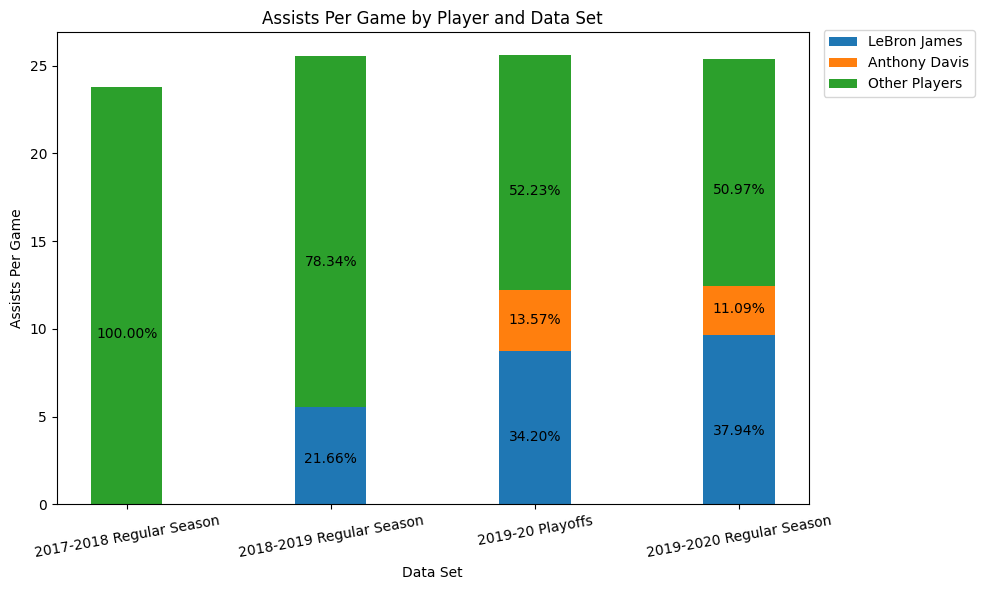

In [ ]:
import matplotlib.pyplot as plt

# Assuming merged_df contains your data
# Replace 'assists_per_game_lebron', 'assists_per_game_anthony', and 'assists_per_game_other_players' with actual column names

# Plot the data
plt.figure(figsize=(10, 6))

# Define the width of the bars
bar_width = 0.35

# Calculate the total assists for text annotations (if not already calculated)
total_assists = merged_df['assists_per_game_lebron'] + merged_df['assists_per_game_anthony'] + merged_df['assists_per_game_other_players']

# Plot the bars for each player with adjusted width
lebron_bars = plt.bar(merged_df.index, merged_df['assists_per_game_lebron'], width=bar_width, label='LeBron James')
anthony_bars = plt.bar(merged_df.index, merged_df['assists_per_game_anthony'], width=bar_width, bottom=merged_df['assists_per_game_lebron'], label='Anthony Davis')
other_players_bars = plt.bar(merged_df.index, merged_df['assists_per_game_other_players'], width=bar_width, bottom=merged_df['assists_per_game_lebron'] + merged_df['assists_per_game_anthony'], label='Other Players')

plt.xlabel('Data Set')
plt.ylabel('Assists Per Game')
plt.title('Assists Per Game by Player and Data Set')
plt.legend()

# Set the position of the x ticks and labels
plt.xticks(merged_df.index, merged_df['data_set'], rotation=10)

# Add text annotations for amount on top of each bar
for bars in [lebron_bars, anthony_bars, other_players_bars]:
    for i in range(len(bars)):
        yval = bars[i].get_height()
        if yval > 0:
          plt.text(bars[i].get_x() + bars[i].get_width()/2, bars[i].get_y() + yval/2.55, f'{(yval/total_assists[i])*100:.2f}%', ha='center', va='bottom')
        else:
          pass

plt.legend(loc='upper right', bbox_to_anchor=(1.23, 1.02))

plt.tight_layout()
plt.show()

**LeBron James Assists Contribution**  
LeBron James' inclusion in the team led to an increase in the overall average assists per game  
LeBron's ability to facilitate assists effectively may enhance the team's offensive performance by creating more scoring opportunities for his teammates.

In [ ]:
# Define a function to check if "LeBron James" is present in any of the specified columns
def check_lebron_presence(row):
    lebron_columns = ['a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5']
    for column in lebron_columns:
        if row[column] == "LeBron James":
            return 1
    return 0

# Apply the function to each row and create a new column 'LeBron_Present'
LAL_team['LeBron_Present'] = LAL_team.apply(check_lebron_presence, axis=1)

# Display the DataFrame with the new column
print(LAL_team)

               game_id                  data_set       date            a1  \
853      ="0021700788"  2017-2018 Regular Season 2018-02-04     Josh Hart   
854      ="0021700788"  2017-2018 Regular Season 2018-02-04     Josh Hart   
857      ="0021700788"  2017-2018 Regular Season 2018-02-04     Josh Hart   
859      ="0021700788"  2017-2018 Regular Season 2018-02-04     Josh Hart   
860      ="0021700788"  2017-2018 Regular Season 2018-02-04     Josh Hart   
...                ...                       ...        ...           ...   
1755976       21900074  2019-2020 Regular Season 2019-11-01  LeBron James   
1755980       21900074  2019-2020 Regular Season 2019-11-01  LeBron James   
1755982       21900074  2019-2020 Regular Season 2019-11-01  LeBron James   
1755983       21900074  2019-2020 Regular Season 2019-11-01   Danny Green   
1755984       21900074  2019-2020 Regular Season 2019-11-01   Danny Green   

                    a2             a3                        a4  \
853     

<ipython-input-185-06222036c347>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LAL_team['LeBron_Present'] = LAL_team.apply(check_lebron_presence, axis=1)


In [ ]:
lebron_presence_per_game = LAL_team.groupby('game_id')['LeBron_Present'].sum().reset_index()

# Filter to get the game_id where LeBron is present
game_ids_with_lebron = lebron_presence_per_game[lebron_presence_per_game['LeBron_Present'] > 0]['game_id']

# Check if "game_id" appears in game_ids_with_lebron and convert boolean to integers
LAL_team['lebron_played_in_that_game'] = LAL_team['game_id'].isin(game_ids_with_lebron).astype(int)

LAL_team['lebron_played_in_that_game'] = np.where(LAL_team['data_set'] == '2017-2018 Regular Season', 0, LAL_team['lebron_played_in_that_game'])

# Display the DataFrame with the new column
print(LAL_team)


             game_id                  data_set       date            a1  \
0      ="0021700788"  2017-2018 Regular Season 2018-02-04     Josh Hart   
1      ="0021700788"  2017-2018 Regular Season 2018-02-04     Josh Hart   
2      ="0021700788"  2017-2018 Regular Season 2018-02-04     Josh Hart   
3      ="0021700788"  2017-2018 Regular Season 2018-02-04     Josh Hart   
4      ="0021700788"  2017-2018 Regular Season 2018-02-04     Josh Hart   
...              ...                       ...        ...           ...   
56599       21900074  2019-2020 Regular Season 2019-11-01  LeBron James   
56600       21900074  2019-2020 Regular Season 2019-11-01  LeBron James   
56601       21900074  2019-2020 Regular Season 2019-11-01  LeBron James   
56602       21900074  2019-2020 Regular Season 2019-11-01   Danny Green   
56603       21900074  2019-2020 Regular Season 2019-11-01   Danny Green   

                  a2             a3                        a4  \
0      Julius Randle    Brook Lope

<ipython-input-194-4614e936a643>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LAL_team['lebron_played_in_that_game'] = LAL_team['game_id'].isin(game_ids_with_lebron).astype(int)
<ipython-input-194-4614e936a643>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LAL_team['lebron_played_in_that_game'] = np.where(LAL_team['data_set'] == '2017-2018 Regular Season', 0, LAL_team['lebron_played_in_that_game'])


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'LAL_team' with 'LeBron_Present' column and 'assist' column

# Filter rows where LeBron is present and assist column is not null
lebron_present_assists = LAL_team[(LAL_team['lebron_played_in_that_game'] == 1) & (LAL_team['assist'].notnull())]

# Group by 'data_set' and count total assists and total games
lebron_assists_per_game = lebron_present_assists.groupby('data_set')['assist'].count().reset_index(name='LeBron_Assists_Per_Game')
total_games_per_data_set = lebron_present_assists.groupby('data_set')['game_id'].nunique().reset_index(name='Total_Games')

# Merge the two DataFrames on 'data_set'
assist_lebron = pd.merge(lebron_assists_per_game, total_games_per_data_set, on='data_set')

# Calculate average assists per game
assist_lebron['Average_Assists_Per_Game'] = assist_lebron['LeBron_Assists_Per_Game'] / assist_lebron['Total_Games']

print(assist_lebron)


                   data_set  LeBron_Assists_Per_Game  Total_Games  \
0  2018-2019 Regular Season                     1417           55   
1          2019-20 Playoffs                      538           21   
2  2019-2020 Regular Season                     1722           67   

   Average_Assists_Per_Game  
0                 25.763636  
1                 25.619048  
2                 25.701493  


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'LAL_team' with 'LeBron_Present' column and 'assist' column

# Filter rows where LeBron is not present and assist column is not null
lebron_not_present_assists = LAL_team[(LAL_team['lebron_played_in_that_game'] == 0) & (LAL_team['assist'].notnull())]

# Group by 'data_set' and count total assists and total games
not_lebron_assists_per_game = lebron_not_present_assists.groupby('data_set')['game_id'].count().reset_index(name='Not_LeBron_Assists_Per_Game')
total_games_per_data_set = lebron_not_present_assists.groupby('data_set')['game_id'].nunique().reset_index(name='Total_Games')

# Merge the two DataFrames on 'data_set'
assist_nolebron = pd.merge(not_lebron_assists_per_game, total_games_per_data_set, on='data_set')

# Calculate average assists per game
assist_nolebron['Average_Assists_Per_Game'] = assist_nolebron['Not_LeBron_Assists_Per_Game'] / assist_nolebron['Total_Games']

print(assist_nolebron)


                   data_set  Not_LeBron_Assists_Per_Game  Total_Games  \
0  2017-2018 Regular Season                         1950           82   
1  2018-2019 Regular Season                          679           27   
2  2019-2020 Regular Season                           81            4   

   Average_Assists_Per_Game  
0                 23.780488  
1                 25.148148  
2                 20.250000  


In [ ]:
assist_lebron_avg = assist_lebron[['data_set', 'Average_Assists_Per_Game']]
assist_nolebron_avg = assist_nolebron[['data_set', 'Average_Assists_Per_Game']]

# Merge the two DataFrames on 'data_set'
combined_results_outer = pd.merge(assist_lebron_avg, assist_nolebron_avg, on='data_set', how='outer', suffixes=('_LeBron', '_NoLeBron'))

# Display the combined results with an outer join
print(combined_results_outer)

                   data_set  Average_Assists_Per_Game_LeBron  \
0  2018-2019 Regular Season                        25.763636   
1          2019-20 Playoffs                        25.619048   
2  2019-2020 Regular Season                        25.701493   
3  2017-2018 Regular Season                              NaN   

   Average_Assists_Per_Game_NoLeBron  
0                          25.148148  
1                                NaN  
2                          20.250000  
3                          23.780488  


In [ ]:
# Define the desired order of categories
desired_order = ['2017-2018 Regular Season', '2018-2019 Regular Season', '2019-2020 Regular Season', '2019-20 Playoffs']

# Set the categories in the desired order
combined_results_outer['data_set'] = combined_results_outer['data_set'].astype('category').cat.set_categories(desired_order)

# Sort the DataFrame by the "data_set" column
combined_results_outer = combined_results_outer.sort_values(by='data_set')

# Display the sorted DataFrame
combined_results_outer



,data_set,Average_Assists_Per_Game_LeBron,Average_Assists_Per_Game_NoLeBron
3,2017-2018 Regular Season,NaN,23.780488
0,2018-2019 Regular Season,25.763636,25.148148
2,2019-2020 Regular Season,25.701493,20.250000
1,2019-20 Playoffs,25.619048,NaN


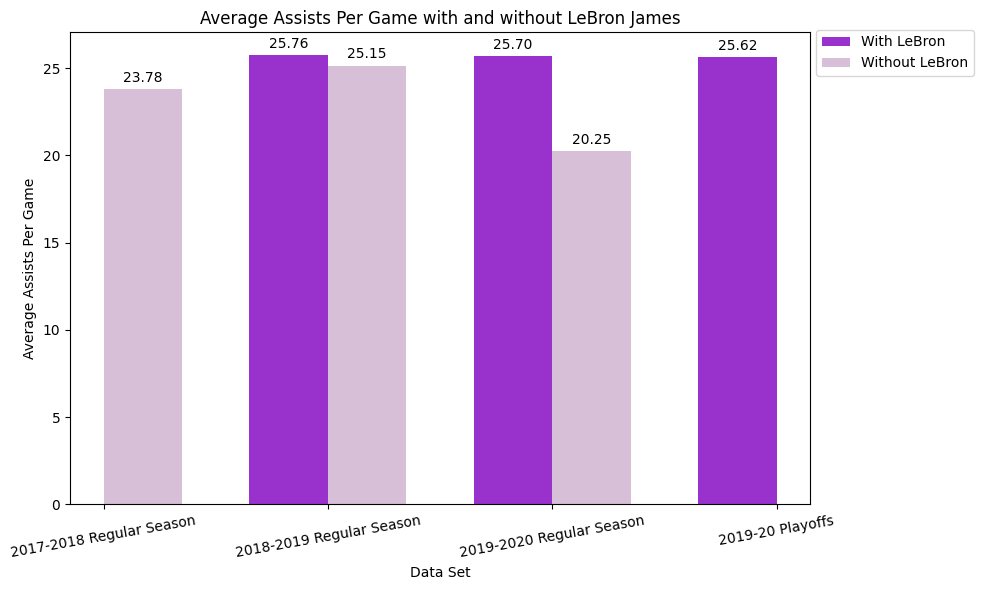

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the width of each bar
bar_width = 0.35

# Define the index for each season
season_index = np.arange(len(combined_results_outer))

# Plot the data
plt.figure(figsize=(10, 6))

# Plot bars for average assists per game with LeBron
bars1 = plt.bar(season_index - bar_width/2, combined_results_outer['Average_Assists_Per_Game_LeBron'], bar_width, color='darkorchid', label='With LeBron')

# Plot bars for average assists per game without LeBron
bars2 = plt.bar(season_index + bar_width/2, combined_results_outer['Average_Assists_Per_Game_NoLeBron'], bar_width, color='thistle', label='Without LeBron')

# Add labels and title
plt.xlabel('Data Set')
plt.ylabel('Average Assists Per Game')
plt.title('Average Assists Per Game with and without LeBron James')

# Set x-axis tick labels to be the data set names
plt.xticks(season_index, combined_results_outer['data_set'], rotation=10, ha='center')

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.23, 1.02))

# Add annotations in the center of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()


**Average Assists per Game (with vs. Without LeBron James)**  
The team experienced a noticeable uptick in the average assists per game when LeBron James participated.  
This higher contribution from LeBron implies that his teammates may experience less pressure from the opponents when he is on the court.